In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

%matplotlib inline

In [2]:
calibration = pd.read_csv("CalibrationOfCoilsXYZinAODSetup.dat", sep="\t",index_col=0)

In [3]:
calibration = calibration["FieldZ(Freq=0Hz)mT"]

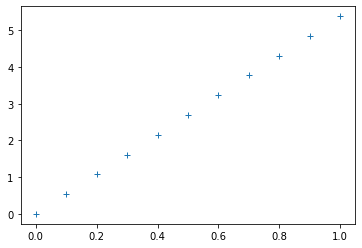

In [4]:
plt.plot(calibration,'+')

In [5]:
calibration.head()

Voltage
0.0    0.00
0.1    0.54
0.2    1.08
0.3    1.61
0.4    2.15
Name: FieldZ(Freq=0Hz)mT, dtype: float64

In [6]:
linear = lambda x,a: a*x
cal_curve = spo.curve_fit(linear, calibration.index.values, calibration.values)

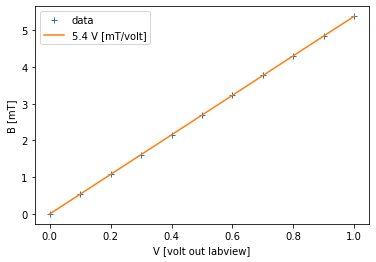

In [7]:
x = np.linspace(0,1,100)

plt.plot(calibration,'+')
plt.plot(x,cal_curve[0][0]*x)
plt.ylabel("B [mT]")
plt.xlabel("V [volt out labview]")
plt.legend(["data","%2.2g V [mT/volt]"%cal_curve[0][0]])

In [8]:
used_volts = np.array([0.05,0.1,0.15])
used_volts*cal_curve[0][0]

array([0.26907792, 0.53815584, 0.80723377])

# Interaction Strength

In [9]:
import pint

In [10]:
ureg = pint.UnitRegistry()

The magntiude of the dipole moment is:

$$m = \frac{B\chi V}{\mu_0}$$

In [11]:
chi = 0.4
rho = 1.4 * ureg.um
mu0 = 4e-7*np.pi* ureg.N/ureg.A**2

cal = cal_curve[0][0] * (ureg.mT/ureg.volts)
used_volts = np.array([0.05,0.1,0.15,0.15]) * ureg.volts
used_fields= used_volts*cal
print(used_fields)

V = 4/3*np.pi*rho**3

[0.2690779220786343 0.5381558441572686 0.8072337662359027 0.8072337662359027] millitesla


In [12]:
m = (V*used_fields*chi/mu0)
print(m.to_base_units())

[9.844664242450294e-16 1.9689328484900588e-15 2.953399272735088e-15 2.953399272735088e-15] ampere * meter ** 2


The interaction energy between two parallel dipoles is:

$$U(r) = m^2\frac{\mu_0}{4\pi}\frac{1}{r^3} \textrm{N m}$$

This can be written as:
$$U\left(\frac{r}{d}\right) = m^2\frac{\mu_0}{4\pi d^3}\left(\frac{r}{d}\right)^{-3} \mathrm{N m}$$

In [13]:
print((m**2*mu0/(4*np.pi)/rho**3).to_base_units())

[3.5319757305604766e-20 1.4127902922241907e-19 3.1787781575044277e-19 3.1787781575044277e-19] kilogram * meter ** 2 / second ** 2


In [14]:
Kb = 1.38064852e-23*ureg.J/ureg.K
T = 300*ureg.K
KbT = (Kb*T).to(ureg.pN*ureg.nm)
KbT

4.141945559999999 <Unit('nanometer * piconewton')>

In [15]:
print(((m**2*mu0/(4*np.pi)/(2*rho)**3)/KbT).to_base_units())

[1.0659168739051692 4.263667495620677 9.59325186514652 9.59325186514652] dimensionless


## Scaling by the average distance between neighbors

In [16]:
R = np.array([5,5,5,10])*ureg.um
N = np.array([5,5,5,11])
d_ave = (2*np.pi*R) / N

In [17]:
d_ave

array([6.28318531, 6.28318531, 6.28318531, 5.71198664]) <Unit('micrometer')>

In [18]:
print(((m**2*mu0/(4*np.pi)/(d_ave)**3)/KbT).to_base_units())

[0.09433173586605244 0.37732694346420975 0.8489856227944715 1.1299998639394413] dimensionless
